Helmholtz Equation
===

The Holmholtz equation or frequency domain wave equation is

$$
-\Delta u - \omega^2 u = f
$$

we consider Dirichlet ("hard") boundary conditions 

$$
u(x) = 0 
$$

and Robin ("absorbing") boundary conditions

$$
\frac{\partial u}{\partial n} - i \omega u = 0 \qquad \text{ on } \Gamma_R
$$

The weak form is 

$$
\int_\Omega \nabla u \nabla v - \omega^2 u v - i \omega \int_{\Gamma_R} u v = \int_\Omega f v
$$

In [32]:
from ngsolve import *
from ngsolve.webgui import Draw
from math import pi
import numpy as np
from scipy.sparse import csr_matrix

In [33]:
f = 10
omega = 2*pi*f
h = 1/(12*f)

In [34]:
omega*h

0.5235987755982988

In [35]:
mesh = Mesh(unit_square.GenerateMesh(maxh=h))
Draw (mesh)

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

BaseWebGuiScene

In [36]:
mesh.nv, mesh.ne

(16924, 33366)

In [37]:
fes = H1(mesh, order=1, complex=True)
print ("number of dofs =", fes.ndof)

number of dofs = 16924


In [38]:
u = fes.TrialFunction()
v = fes.TestFunction()

a = BilinearForm(fes)
a += (grad(u)*grad(v)-omega**2*u*v)*dx
a += -1j*omega*u*v*ds
a.Assemble()
# print (csr_matrix(a.mat.CSR()))


In [47]:

source = 1/(h**2)*exp(-(300**2)*((x-0.5)*(x-0.5) + (y-0.5)*(y-0.5)))
f = LinearForm(source*v*dx).Assemble()
# print (np.array(f.vec))

In [48]:
gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec

In [49]:
Draw(gfu, mesh, order=3, animate_complex=True)

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 's…

BaseWebGuiScene

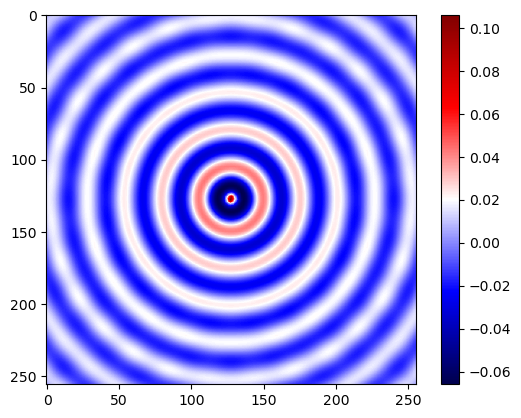

In [50]:
import matplotlib.pyplot as plt
N = 256
X = np.linspace(0, 1, N)
u = np.zeros((N,N))
for i in range(N):
    Y = np.ones_like(X) * X[i]
    u[:,i] = gfu(mesh(X, Y))[:,0].real
plt.imshow(np.rot90(u), cmap="seismic")
plt.colorbar()